# Sound Waves Superposition

So the first soundwave will be of the form

$$ f_1(x, t) = f_1(kx-\omega t) $$

and the second will be


$$ f_2(x, t) = f_2(kx-\omega t) $$

At the point $x$ at time $t$ the observed soundwave will be

$$ f(x,t) = f_1(k(x-x_1) - \omega t) + f_2(k(x-x_2) - \omega t) $$

If $f_1$ and $f_2$ are the same frequency, then we'll observe a position dependent phase shift.



$$ \begin{align}
sin(k(x-x_1) - \omega t) + sin(k(x-x_2) - \omega t) = \\
sin(a) + sin(b) = 
\end{align}
$$

## Phasors... Shit, how do these work again?

And here I realize that I can no longer remember why adding two sinusoids together naturally results in a phase shifted sin function, or even how the whole ... what's it called? The vectory thingies that we use... phasors!


Right, phasors. I remember that phasors let me add together two sinuosoids to get a new one, but I'm trying to remember why this should be obvious... :(

Right; Phasors are basically just going from

$$ sin(t + \phi) = sin(t)cos(\phi) + sin(\phi)cos(t) $$

In reverse (right hand side to left hand side ($\leftarrow$)), where we simply recast the $\phi$...

Screw that! I've forgotten the golden rule: "Never work with sinusoids when you can work with exponentials. Everything is so much more obvious when you're in the complex plane"

$$
\begin{align}
sin(\omega t + \phi) + sin(\omega t + \phi_2)= \frac{e^{j(\omega t + \phi)} - e^{j(\omega t+\phi)}}{2i} + \frac{e^{j(\omega t + \phi_2)} - e^{j(\omega t+\phi_2)}}{2i} 
\end{align}
$$

$$
= \frac{e^{j\omega t}e^{j\phi} - e^{j\omega t}e^{\phi}}{2i}
+ \frac{e^{j\omega t}e^{j\phi_2} - e^{j\omega t}e^{\phi_2}}{2i}\\
$$

$$=\frac{e^{jwt}(e^{j\phi}+e^{j\phi_2}) - e^{j\omega t}(e^{j\phi}+e^{j\phi_2})}{2i}$$

So it's a sinusoid again! Huzzah! All we have to do is resolve the complex addition of $e^{j\phi} + e^{j\phi_2}$ and turn that back into something of the form $A e^{j\phi_3}$ and we're done! Now we remember why we made little triangle diagrams back in the day!

## Alright, Back to work!
So what we can do now is get an expression of phase in terms of $x_1$, $x_2$, and $\phi_1$ and $\phi_2$. That's not super useful! Ignoring the issue of $\phi_1$ and $\phi_2$ for a moment (that's basically the phase shift caused by the two devices starting up, and theoretically could be resolved by sending that information over wifi, but lets call those time offsets $t_1$ and $t_2$) we still have $x_1$ and $x_2$, so we would still have two unknowns. However, if we introduce a second frequency, we can resolve this!

So with a single frequency we get
$$e^{j\phi_1}+e^{j\phi_2}$$
$$\phi_1 = k(x-x_1) + \omega t_1$$
$$\phi_2 = k(x-x_2) + \omega t_2$$
$$Ae^{j\phi_3} = (\cos(\phi_1) + \cos(\phi_2))+(\sin(\phi_1)+\sin(\phi_2))j$$
$$\phi_3 = \tan^{-1}\frac{\sin(\phi_1)+\sin(\phi_2)}{\cos(\phi_1)+\cos(\phi_2)}$$
$$A = \sqrt{(\cos^2\phi_1+\sin^2\phi_1)+(\cos^2\phi_2+\sin^2\phi_1) + (2\cos\phi_1\cos\phi_2+2\sin\phi_1\sin\phi_2)}\\=\sqrt{2-2\cos(\phi_1-\phi_2)} (wrong!)$$



That last equation looks wrong. It's 0 if $\phi_1=\phi_2$ and I don't see why that should be the case. If $\phi_1$ and $\phi_2$ are equal, it should be complete constructive interference. I'd be fine if it were $\sin$, but it's $\cos$ so I'm a bit confused.

Actually, if I flip the sign, it works, because then it's $4$ when they're equal, which is what we actually want; however, I can't figure out why it's not negative now. (we make it negative by making the two functions $180^\circ$ out of phase, which is definitely what we want.

It's wrong becuase there no reason for it to be negative. Flipping the sign inside cosine doesn't affect the sign OUTSIDE! D'uh!

$$A = \sqrt{2+2\cos(\phi_1-\phi_2)}$$

And there was much rejoicing!

Now plugging back in values for the $\phi$'s:

$$A = \sqrt{2}\sqrt{1+\cos(k(x_2-x_1) + \omega (t_1-t_2))}$$
$$A = \sqrt{2}\sqrt{1+\cos(k\Delta x - \omega\Delta t)}$$

Unfortunately, we can only use that equation so much; because if the amplitudes of the two waves are different, $A$ is no where nearly so nice, we have to go back to the full equation and instead get:

$$C = \sqrt{A^2+B^2 + 2AB\cos\phi_1\cos\phi_2 + 2AB\sin\phi_1\phi_2}$$

Oh, that actually isn't bad at all! It simplifies to

$$C = \sqrt{A^2+B^2 + 2AB\cos(\phi_1-\phi_2)}$$
$$C = \sqrt{A^2+B^2 + 2AB\cos(k\Delta x - \omega\Delta t)}$$

And $\phi_3$ likewise simply becomes:
    
$$\phi_3 = \tan^{-1}\frac{A \sin(\phi_1)+B\sin(\phi_2)}{A\cos(\phi_1)+B\cos(\phi_2)}$$

Okay, again, assuming that $\Delta t$ can be assume to be known, we can either attempt to solve the measured $\phi_3$ phase shift equation and the Amplitude equation. I'd rather just solve multiple phase shift equations, because I suspect that they'll be less noisy than the amplitude signal. However, we can clearly see that we need the original amplitudes of $A$ and $B$ anyhow, and the relative shift will be ultitimately be affected by volume drop off (which I've been completely ignoring). Oh noes!

## Another concern
The values of both $\phi_1$ and $\phi_2$ are both unbounded; which means that the argument passed to $\tan^{-1}$ is periodic, which means that $\phi_3$ is also periodic, even when A and B are known. Which means that space is being broken up into non-distingushable regions. This issue might go away (or change) after we take back into account drop off. It's still interesting though, so I should investigate it in the pure form.

 ## Testing!
 
 Alright, let's go test these equations!

In [4]:
import numpy

In [55]:
def add_sinusoids(sin1, sin2):
    s = numpy.sin
    c = numpy.cos
    A, phi1 = sin1
    B, phi2 = sin2
    C = numpy.sqrt(A**2+B**2+2*A*B*numpy.cos(phi1-phi2))
    phi3 = numpy.arctan2(A*s(phi1)+B*s(phi2), A*c(phi1)+B*c(phi2))
    return (C, phi3)

In [28]:
def numeric_sinusoid(sinusoid):
    A, phi = sinusoid
    return numpy.vectorize(lambda x: A*numpy.sin(x+phi))

In [13]:
add_sinusoids((1, 0), (1, numpy.pi/2))

(1.4142135623730951, 0.78539816339744828)

In [15]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

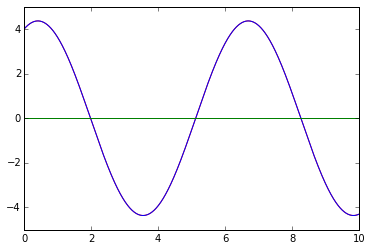

In [56]:
x = np.arange(0,10,.01)
y1 = 2*numpy.sin(x+np.pi/6)
y2 = 3*numpy.sin(x+np.pi/2)
C, phi3 = add_sinusoids((2,np.pi/6), (3,numpy.pi/2))
plt.plot(x, y1+y2, 'r')
plt.plot(x, C*numpy.sin(x+phi3), 'b')
plt.plot(x, y1+y2-C*numpy.sin(x+phi3), 'g')

In [33]:
x[999]

9.9900000000000002

In [45]:
add_sinusoids((2,np.pi/6), (3,numpy.pi/2))

(4.0, 1.1621584716973041)

## Extracting Amplitude (wrong)
Probably the easiest way, that will also allow me to deal with errors, is to simply evaluate

$$ \int^{T}_0 \sin(\omega t+\phi) A \sin(\omega t + \phi) = \frac{A \pi}{2} $$
$$ A = \frac{2}{\pi}\int^{T}_0 \sin(\omega t+\phi) A \sin(\omega t + \phi) $$

which can easily be evaluated with

```
np.dot(data, data)
```

## Extracting Phase (wrong)
Likewise once Amplitude has been deterimined, we can run...

After reconsidering the situation, the above is stupid. This is what should be done instead.

## Extracting Amplitude
$$ \int^{T}_0 \sin(\omega t) A \sin(\omega t + \phi) = \frac{A \pi\cos(\phi)}{\omega} $$

$$ \int^{T}_0 \cos(\omega t) A \sin(\omega t + \phi) = \frac{A \pi\sin(\phi)}{\omega} $$

So

$$ A = 2\sqrt{\left(\int^{T}_0 \sin(\omega t) A \sin(\omega t + \phi)\right)^2+\left(\int^{T}_0
\cos(\omega t) A \sin(\omega t + \phi)\right)^2}$$

And from that, $\phi$ can quickly be resolved.

In [61]:
def extract_amplitude(t, frequency, data):
    s = np.dot(np.sin(frequency*t), data)
    c = np.odt(np.cos(frequency*t), data)
    A = 2* np.sqrt(s**2 + c**2)
    return A 


So the above function assumes that there is only one period in the data, let's fix that.

$$ \int^{nT}_0 \cos(\omega t) A \sin(\omega t + \phi) \approx n\frac{A\pi \sin(\phi)}{\omega} $$

Approximate because I'm ignoring the left over.

In [118]:
def extract_amplitude(t, frequency, data):
    total_t = t[-1] - t[0]
    dt = t[1]-t[0]
    n = total_t * frequency
    s = np.dot(np.sin(np.pi*2*frequency*t)*dt, data)
    c = np.dot(np.cos(np.pi*2*frequency*t)*dt, data)
    A = (2*np.pi*frequency* np.sqrt(s**2 + c**2))/(n*np.pi)
    return A 

In [120]:
# Testing!
t = np.arange(0,20*np.pi*2,.01)
extract_amplitude(t, 5, 4.2*np.sin(5*2*np.pi*t))

4.2006047196632563

Okay, I cheated a bit deriving the original integral above (change a variables quickly fixes the issue), and will need to fix it. But anyhow, this works!